In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from calendar import monthrange

# Set Seaborn style
sns.set(style="whitegrid")


In [ ]:
# Get today's date
today = datetime.now()

# Extract day, month, year
current_day = today.day
current_month = today.month
current_year = today.year

print(f"📅 Today's Date: {today.strftime('%B %d, %Y')}")


📅 Today's Date: August 05, 2025


In [ ]:
# Get number of days in the current month
days_in_month = monthrange(current_year, current_month)[1]

# Generate date range
dates = pd.date_range(start=f"{current_year}-{current_month:02d}-01", periods=days_in_month)

# Simulate weather data
np.random.seed(42)
temperatures = np.random.normal(loc=27, scale=4, size=days_in_month)
humidity = np.random.uniform(40, 90, size=days_in_month)
conditions = np.random.choice(['Sunny', 'Cloudy', 'Rainy', 'Stormy', 'Windy'], size=days_in_month)

# Create DataFrame
weather_df = pd.DataFrame({
    'Date': dates,
    'Temperature(C)': np.round(temperatures, 1),
    'Humidity(%)': np.round(humidity, 1),
    'Condition': conditions
})

weather_df.head()


,Date,Temperature(C),Humidity(%),Condition
0,2025-08-01,29.0,46.1,Stormy
1,2025-08-02,26.4,64.8,Rainy
2,2025-08-03,29.6,41.7,Rainy
3,2025-08-04,33.1,85.5,Sunny
4,2025-08-05,26.1,52.9,Rainy


In [ ]:
print("📊 Weather Summary for", today.strftime('%B %Y'))
display(weather_df.describe(include='all'))


📊 Weather Summary for August 2025


,Date,Temperature(C),Humidity(%),Condition
count,31,31.000000,31.000000,31
unique,NaN,NaN,NaN,5
top,NaN,NaN,NaN,Rainy
freq,NaN,NaN,NaN,11
mean,2025-08-16 00:00:00,26.196774,64.580645,NaN
min,2025-08-01 00:00:00,19.300000,41.700000,NaN
25%,2025-08-08 12:00:00,24.600000,51.350000,NaN
50%,2025-08-16 00:00:00,26.100000,64.800000,NaN
75%,2025-08-23 12:00:00,28.400000,79.450000,NaN
max,2025-08-31 00:00:00,33.300000,89.300000,NaN


/tmp/ipython-input-3827739565.py:7: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


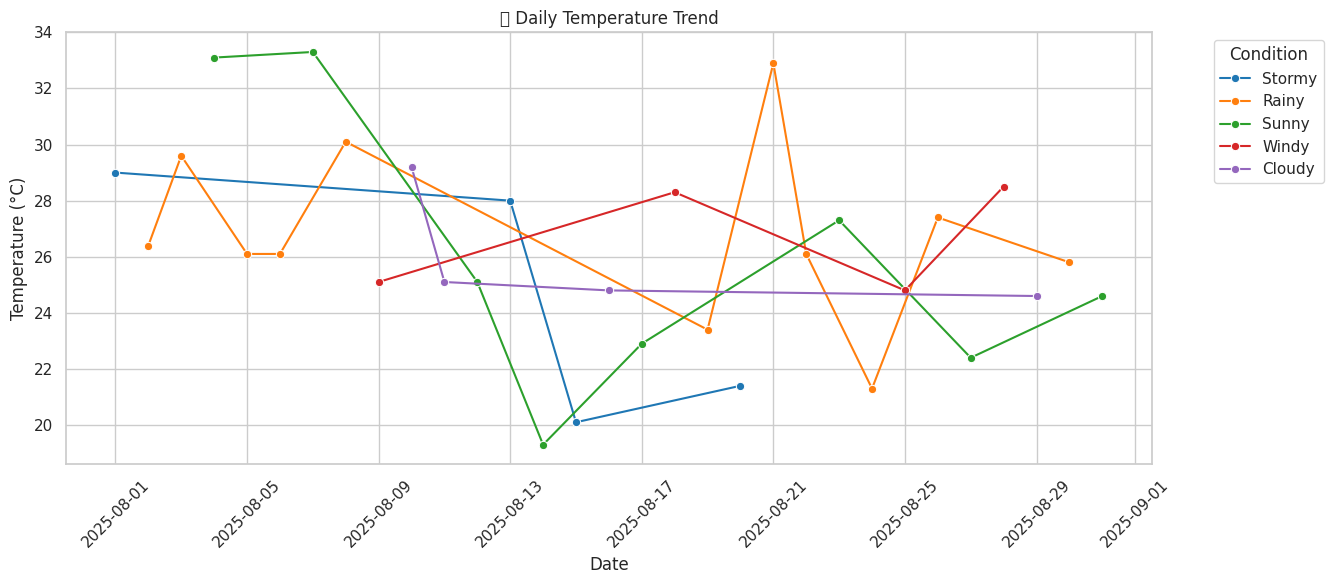

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=weather_df, x='Date', y='Temperature(C)', hue='Condition', marker='o', palette='tab10')
plt.title("🌡️ Daily Temperature Trend")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/tmp/ipython-input-1757094757.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=condition_summary, x='Condition', y='Temperature(C)', palette='coolwarm')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


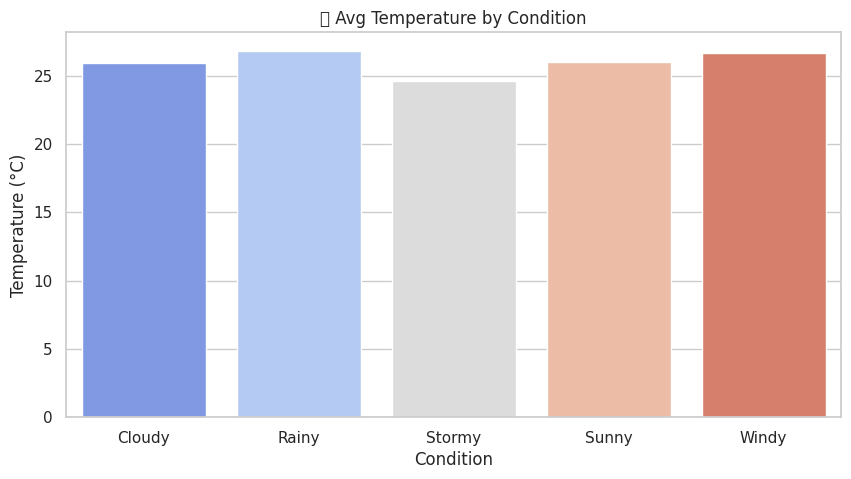

/tmp/ipython-input-1757094757.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=condition_summary, x='Condition', y='Humidity(%)', palette='Blues')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


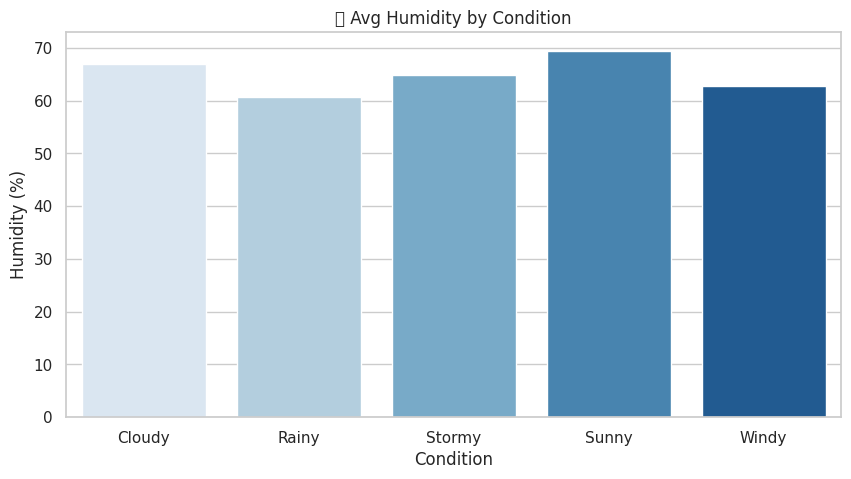

In [ ]:
condition_summary = weather_df.groupby('Condition')[['Temperature(C)', 'Humidity(%)']].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=condition_summary, x='Condition', y='Temperature(C)', palette='coolwarm')
plt.title("📊 Avg Temperature by Condition")
plt.ylabel("Temperature (°C)")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=condition_summary, x='Condition', y='Humidity(%)', palette='Blues')
plt.title("💧 Avg Humidity by Condition")
plt.ylabel("Humidity (%)")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


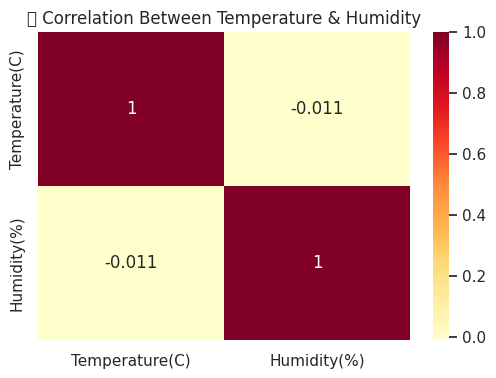

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(weather_df[['Temperature(C)', 'Humidity(%)']].corr(), annot=True, cmap='YlOrRd')
plt.title("📈 Correlation Between Temperature & Humidity")
plt.show()
